<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-MariaMartin42/blob/main/TADM2022_Razonamiento_Borroso_Mar%C3%ADa_Mart%C3%ADn_Moreno_Alises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sistema Borroso
 

Vamos a crear un sistema de control borroso que modela cómo se puede evaluar la capacidad de un cliente para pedir un préstamo. Cuando se tiene que dar un préstamos se considerará la edad del peticionario, la cantidad del préstamos, la duración y los pagos en los que se divide. FInalmente nos dará una puntuación de 0 a 10 al préstamo. 


## Preliminares

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

* instalación de scikit-fuzzy

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4f68476f2e5ab1a535c91aacbeb1d7f68cf40af6f562af95b6b8ec247b47566c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


* importación de librerías


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##  Sistema Borroso

Definimos los Antecedentes
* Edad del cliente
* pagos mensuales
* Cantidad del Préstamo
* Duración de la Amortización (min: 12 max 60)



1.Variables de entrada: 
-nombre
-dominio []
-nº de etiquetas (nombres)

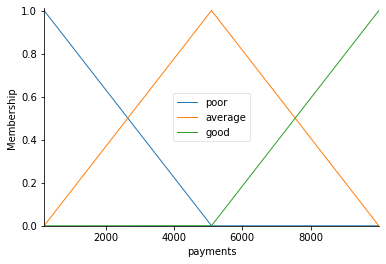

In [ ]:
#nombre: 'payments'
#rango/dominio: np.arange(200, 10000,1)
payments = ctrl.Antecedent(np.arange(200, 10000, 1), 'payments') 
payments.automf(3) #nº de etiquetas
payments.view()

El nombre de las etiquetas (poor, average, good) las pone por defecto al indicarle que queremos 3 etiquetas.

Como podemos observar los pagos empiezan siendo pocos, de 0 a 5000, y a partir de este último, comienzan a elevarse el número de pagos.

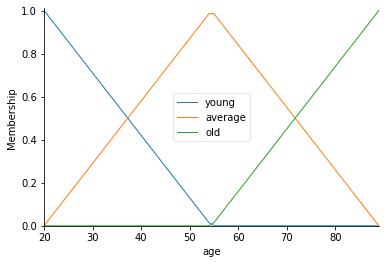

In [ ]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

En este caso, lo que se represeta es en cuanto a la edad, considerándose jóven a un cliente hasta los 55 años, aproximádamente, y a partir de dicha edad pasará a considerarse como cliente anciano.

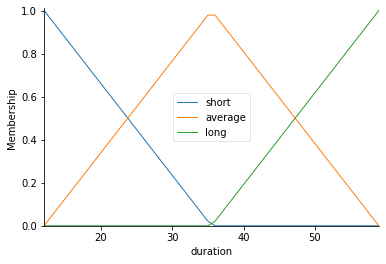

In [ ]:
duration = ctrl.Antecedent(np.arange(12, 60, 1), 'duration')
duration.automf(3, names=["short", "average", "long"])
duration.view()

En cuanto a la duración, esta se considerará corta hasta los 35 meses, considerándose de larga duración a partir de estos.

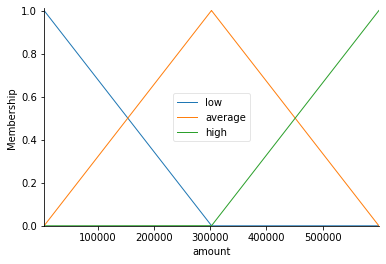

In [ ]:
amount = ctrl.Antecedent(np.arange(5000, 600000, 1), 'amount')
amount.automf(3,  names = ["low","average","high"])
amount.view()

Sin embargo, en cuanto al importe, se considerará baja cantidad hasta los 300000, considerando a partir de dicha cantidad como alta.

2.Definimos el consecuente (la variable de salida: 
-nombre
-dominio
-etiquetas)

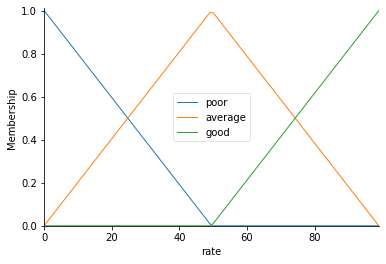

In [ ]:
rate = ctrl.Consequent(np.arange(0, 100, 1), 'rate')
rate.automf(3)
rate.view()


## Reglas borrosas
-----------
Ahora, para hacer estos triángulos útiles, definimos la *relación borrosa*
entre las variables de entrada y salida. Para el ejemplo vamos a considerar las siguientes reglas simples (para hacer un sistema completo se necesitarían algunas más) 

1. Si la duración y la cantidad son pequeñas entonces la calificación será buena.
2. Si la cantidad es alta, los pagos pequeños y la duración alta entonces la calificación será *pobre*
3. Si la cantidad es media y los pagos también medios si la edad del cliente es baja entonces el rating es medio. 

La clave de estas reglas es que son borrosas, es decir que expresamos la información de forma lingüística intentando manejar la incertidumbre inherente. 



Definir las reglas:
-etiquetas (tabla doble entrada)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a84417050>)

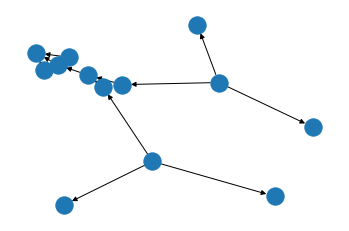

In [ ]:
rule1 = ctrl.Rule(duration['short'] & amount['low'], rate['good'])
rule2 = ctrl.Rule(amount['high'] & payments['average'] & duration["long"], rate["poor"])
rule3 = ctrl.Rule(age['young'] & amount['average'], rate['average'])

rule1.view()

Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control vía:

In [ ]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
rating_ctrl.graph

Con el fin de simular este sistema de control, crearemos un
"Sistema de Control y Simulación".  Este objeto que representa al controlador aplicado a un conjunto específico de circunstancias.  

In [ ]:
rating = ctrl.ControlSystemSimulation(rating_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método *compute*.  

Supongamos que un cliente de 40 años va a pedir un préstamos a 12 años con pagos de 2000 y una cantidad de 300000

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000


44.52999446644107


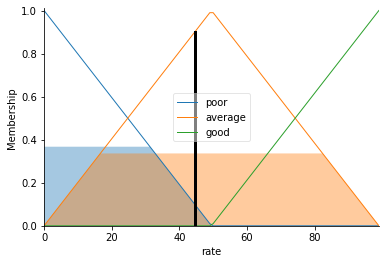

In [ ]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Para las características especificadas del cliente, es decir, un cliente de 40 años que solicite un préstamo a 12 años con pagos de 2000 y una cantidad de 300000, la calificación para su concesión es de un 44,52%, lo que podría considerarse dentro de baja-media posibilidad debido a las características que este poseé y como podemos observar gráficamente. 

Con las mismas reglas utilizadas anteriormente podemos evaluar el caso de otro cliente, el cual presenta las siguientes características: 

-Edad: 30 años
-Tiempo: 5 años
-Pagos de 1000
-Cantidad de 8000

In [17]:
rating.input['age'] = 30
rating.input['duration'] = 30
rating.input['payments'] = 1000
rating.input['amount'] = 8000


74.59806825380359


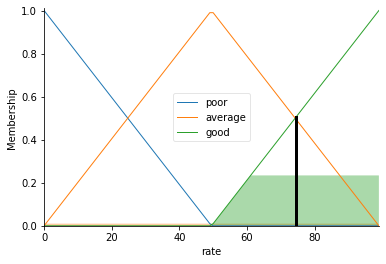

In [18]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Como podemos observar, este cliente tiene mayor posibilidad de que se le conceda el préstamos que ha pedido, puede ser por ambos motivos, ya que la cantidad solicitada es inferior a la solicitada por el anterior cliente y a su vez puede deberse por la edad de este y el tiempo de amortización. Por tanto, este se sitúa en un 74,6 de calificación. 